<a href="https://colab.research.google.com/github/leeilgyu/pyhton/blob/main/12_7_%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import os

fashion_mnist = tf.keras.datasets.fashion_mnist

# 데이터를 불러옵니다.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
print(x_train.shape)

(60000, 28, 28)


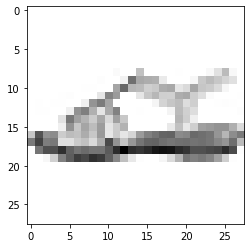

In [ ]:
# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(x_train[257], cmap='Greys')
plt.show()
     

In [ ]:

# 이미지가 인식되는 원리를 알아봅시다.

import sys

for x in x_train[257]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')
     

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  9  0  0  90 0  0  0  0  1  0  0  0  14 52 97 13 0  
0  0  0  0  0  0  0  0  0  3  0  0  26 16211210810640 0  0  0  17 81 97 84 69 53 0  
0  0  0  0  0  0  0  2  2  0  0  11517010197 75 81 10811246 62 11485 79 61 18 0  0  
0  0  0  0  2  4  0  0  0  45 1431230  0  45 84 10075 73 10811276

In [ ]:

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
y_train[257]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.

#MODEL_DIR = './data/model/'
#if not os.path.exists(MODEL_DIR):
#    os.mkdir(MODEL_DIR)

modelpath="./data/model/MNIST_CNN.hdf5"


checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(x_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.37267, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.37267 to 0.33355, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.33355 to 0.27414, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.27414 to 0.25591, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 5: val_loss did not improve from 0.25591

Epoch 6: val_loss improved from 0.25591 to 0.24456, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.24456 to 0.23962, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 8: val_loss improved from 0.23962 to 0.22752, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 9: val_loss did not improve from 0.22752

Epoch 10: val_loss did not improve from 0.22752

Epoch 11: val_loss did not improve from 0.22752

Epoch 12: val_loss did not improve from 0.22752

Epoch 13: val_loss did not improve from 0.22752

Epoch 14: val_loss did not impro

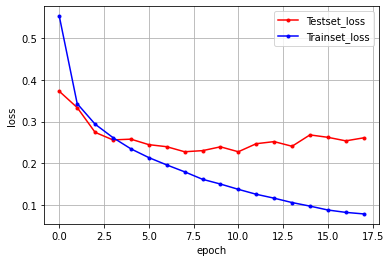

In [ ]:
# 검증셋과 학습셋의 오차를 그래프로 표현
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()